## Polinomio auto regressivo
Se tem np polos, significa que precisa de np pontos anteriores.\
O $z^{-d}$ é o atraso de transporte \
Função custo possível:
$$J = MSE+\lambda\sum numero de parametros$$
## Estimador de Markov
Estimador dos minimos quadrados ponderados
$$J=[Y - \Phi\hat{\Theta}]^TW[Y - \Phi\hat{\Theta}]$$

In [1]:
import numpy as np
import seaborn as sb

In [2]:
y = np.arange(100)[::-1]+np.random.normal(size=100)
u = y*-1+np.random.normal(size=100)

In [3]:
n = 2
amostras = len(y)
Phi = np.column_stack((y[n-2:amostras-2],y[n-1:amostras-1],y[n:],u[n-2:amostras-2],u[n-1:amostras-1],u[n:]))
Phi.shape

(98, 6)

In [4]:
theta = np.linalg.inv(Phi.T.dot(Phi)).dot(Phi.T).dot(y[n:])
y_hat = np.sum(Phi*theta.T,axis=1)
np.sum((y_hat-y[n:])**2)

4.1762117983752705e-21

In [5]:
def lsqrt_memoria(n, u, y):
    amostras = len(u)
    M = np.column_stack((y[n-2:amostras-2],y[n-1:amostras-1],y[n:],u[n-2:amostras-2],u[n-1:amostras-1],u[n:]))
    y = np.array(y)
    theta = np.linalg.inv(M.T.dot(M)).dot(M.T).dot(y[n:])
    y_hat = np.sum(M*theta.T,axis=1)
    return y_hat

In [6]:
y_hat = lsqrt_memoria(2,u,y)
np.sum((y[n:]-y_hat)**2)

4.1762117983752705e-21

In [1]:
# Estimador dos mínimos quadrados não-recursivo (em batelada)
# Processo de segunda ordem (2 pólos e 2 zeros)
#Bibliotecas usadas
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

#Importa um arquivo com os dados de saída
with open('aula_03.csv','r') as f:
    data = np.loadtxt(f,delimiter=',')

In [2]:
print('Método dos mínimos quadrados em batelada')
npts = data.size # O número de pontos existentes
u = np.arange(npts) # Como os dados são sequênciais, é gerado uma sequência de números
y = data # Salva os dados de saídas
print(f'Número de pontos: {npts}')

phi = np.ones([npts,4]) # Inicia a matriz Phi para 4 parametros
for j in range(npts): # Loop para preencher a matriz Phi
    if j <= 2:
        y1 = y[1]
        y2 = y[1]
        u1 = 0
        u2 = 0
    else:
        y1 = y[j-1]
        y2 = y[j-2]
        u1 = u[j-1]
        u2 = u[j-2]
    phi[j] = [-y1,-y2,u1,u2]
 
theta = np.linalg.inv(phi.T.dot(phi)).dot(phi.T).dot(y) # Calcula os parametros através de operações matriciais
numparametros = theta.shape[0]
print(f'Número de parâmetros estimados (na + nb): {numparametros}')

# Printa os parametros estimados
for i in range(numparametros):
    print(f'theta({i}) = {theta[i]}')

Número de pontos: 423
Número de parâmetros estimados (na + nb): 4
theta(0) = -1.3709351735917168
theta(1) = 0.394644532839246
theta(2) = 0.35872778502619895
theta(3) = -0.3550846594381656


In [3]:
# Inicia a matriz de valores n passos a frente para ser preenchida
yest_n = np.ones(npts)
yest_n[:2] = y[:2] # Preenche os dois pontos iniciais
yest_1 = yest_n.copy() # Cria uma copia da matriz

# Theta e seus respectivos valores
a1=theta[0]
a2=theta[1]
b1=theta[2]
b2=theta[3]

# A partir do segundo ponto, calcula o valor da saída conforme os parametros estimados
for t in range(2,npts):
    # Previsão de n passos a frente
    yest_n[t] = -a1*yest_n[t-1]-a2*yest_n[t-2]+b1*u[t-1]+b2*u[t-2]
    # Previsão de um passo a frente
    yest_1[t] = -a1*y[t-1]-a2*y[t-2]+b1*u[t-1]+b2*u[t-2]

# Mean Squared Error (MSE) – objetivo é um menor MSE
MSE_1 = np.sum((y-yest_1)**2)/npts
MSE_n = np.sum((y-yest_n)**2)/npts

print(f'MSE_1: {MSE_1}')
print(f'MSE_n: {MSE_n}')

MSE_1: 20.38691228719461
MSE_n: 574.4708136173238


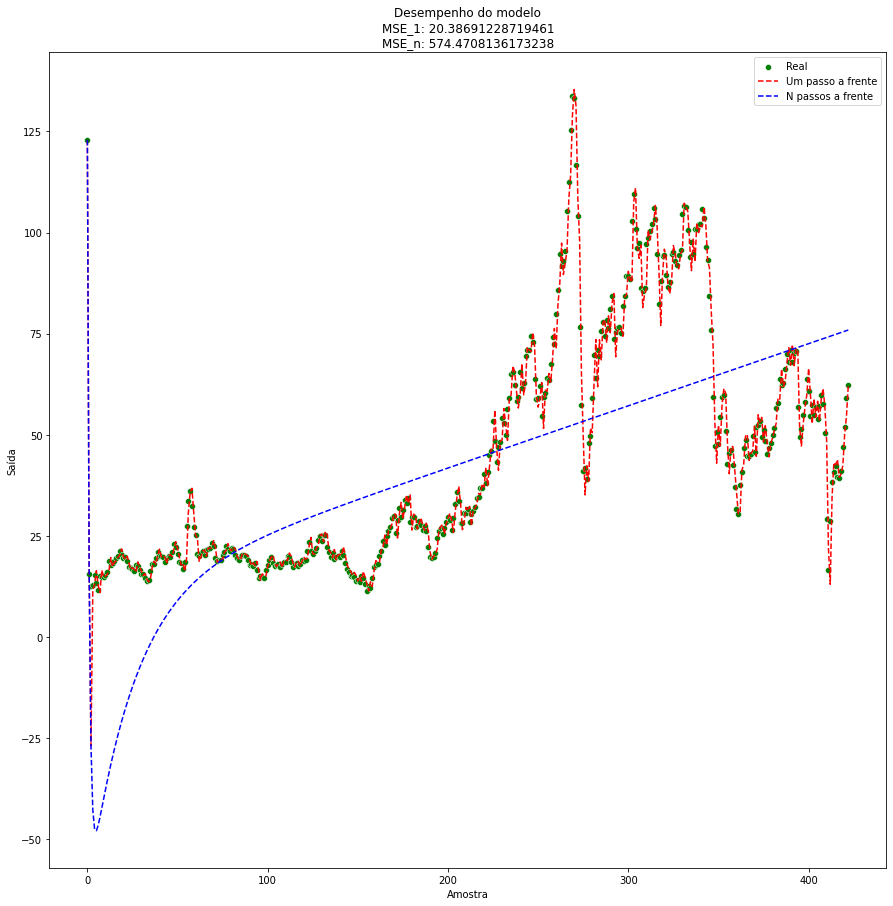

In [4]:
# Plota a figura
plt.figure(figsize = (15,15))
sb.scatterplot(x=u,y=y,color='green',markers='.')
sb.lineplot(x=u,y=yest_1,color='red',linestyle='--')
sb.lineplot(x=u,y=yest_n,color='blue',linestyle='--')
plt.title(f'Desempenho do modelo\nMSE_1: {MSE_1}\nMSE_n: {MSE_n}')
plt.legend(labels=["Real","Um passo a frente","N passos a frente"])
plt.xlabel('Amostra')
plt.ylabel('Saída')
plt.show()
plt.close()